# Spatial analysis for $\chi_\rm{b}$

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from util import *

def open_chi(path):  
    ds=(xr.open_dataset(path)*100)
    ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
    ds=ds.reindex(lon=sorted(ds.lon))  
    return ds

def workflow(da,chi,lat_min, lat_max, lon_min, lon_max):
    da_mam4 = da[chi]["MAM4"]
    da_ml = da[chi]["ML"]
    da_diff = da[chi]["diff"]
    # show the maps
    plot_difference_with_anchor(da_mam4,da_ml,da_diff,lat_min, lat_max, lon_min, lon_max)
    # show the mean of chi
    print("mam4 mean:",
          np.float(select_data(da_mam4, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("ml mean:",
          np.float(select_data(da_ml, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("diff mean:",
          np.float(select_data(da_diff, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("abs diff mean:",
          np.float(np.abs(select_data(da_diff, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe()).mean()))
    # show the mode compositions
    print("Mode Composition:")
    comp = year_comp(chi, lat_min, lat_max, lon_min, lon_max)
    axis = comp.plot(kind="bar", stacked=True)
    fig = axis.get_figure()
    display(comp)

In [2]:
year = "2011"
method_ls = ["MAM4","ML","diff","diff_abs"]
chi_ls = ["chi_b"]

file_path = {}
file_path["MAM4"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_chi/"
file_path["ML"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/ml_chi/"
file_path["diff"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_minus_ml_chi/"
file_path["diff_abs"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_minus_ml_chi/"
mask_path = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mask/"

name_ls = {}
name_ls["chi_h"]=r'$\chi_{\rm{h}}$ (%)'
name_ls["chi_b"]=r'$\chi_{\rm{b}}$ (%)'
name_ls["chi_c"]=r'$\chi_{\rm{c}}$ (%)'

char_ls="abcdefghijklmno"

## load data

In [3]:
da={}
for chi in tqdm(chi_ls):
    da[chi]={}
    for method in method_ls:
        if method=="diff_abs":
            da_temp = open_chi(file_path[method]+str(year)+"_"+chi+"_mean_abs.nc")[chi]
            mask = open_chi(mask_path+str(year)+"_"+chi+".nc")["mask"]
            da[chi][method] = da_temp.where(mask)
        
        else:
            da_temp = open_chi(file_path[method]+str(year)+"_"+chi+"_mean.nc")[chi]
            mask = open_chi(mask_path+str(year)+"_"+chi+".nc")["mask"]
            da[chi][method] = da_temp.where(mask)
        
        del da_temp, mask
        gc.collect()

100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


## overall

In [4]:
chi = "chi_b"
#############
for method in ["MAM4","ML","diff","diff_abs"]:
    print(method)
    display(da[chi][method].to_dataframe().describe().transpose())

MAM4


,count,mean,std,min,25%,50%,75%,max
chi_b,37580.0,86.257466,10.537287,46.393091,76.748478,90.180416,94.266094,99.761359


ML


,count,mean,std,min,25%,50%,75%,max
chi_b,37580.0,72.548012,7.511827,54.63229,66.79882,73.038979,77.080269,96.163055


diff


,count,mean,std,min,25%,50%,75%,max
chi_b,37580.0,13.709452,10.353649,-18.863626,7.047183,13.603584,19.399585,41.945478


diff_abs


,count,mean,std,min,25%,50%,75%,max
chi_b,37580.0,17.753766,6.83944,1.754346,13.337091,16.073554,20.735635,41.945478


In [5]:
df_temp = da[chi]["diff"].to_dataframe().dropna()
(df_temp[df_temp[chi]<0].shape[0])/(df_temp.shape[0])*100

8.246407663650878

In [6]:
df_temp = da[chi]["diff"].to_dataframe().dropna()
(df_temp[np.abs(df_temp[chi])<10].shape[0])/(df_temp.shape[0])*100

31.64981373070782

In [7]:
df_temp = da[chi]["diff_abs"].to_dataframe().dropna()
(df_temp[df_temp[chi]<10].shape[0])/(df_temp.shape[0])*100

6.99308142629058

## Arctic

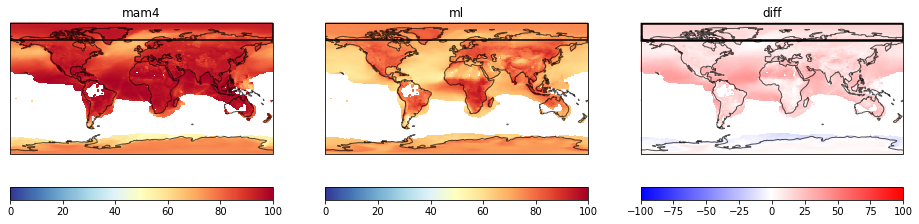

mam4 mean: 89.06834711750719
ml mean: 74.62532043457031
diff mean: 14.443023273447848
abs diff mean: 14.443023273447848
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.000241,0.170095,0.000000,0.076367,0.945398
Accumulation,0.708776,1.337973,13.801279,5.556597,8.038871,25.136350
Primary carbon,5.517944,0.000000,0.000000,38.710110,0.000000,0.000000


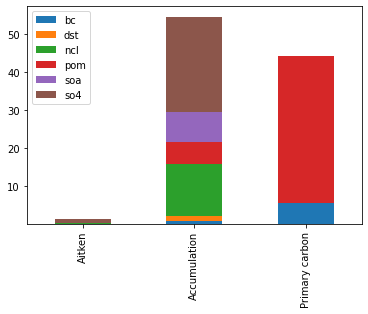

In [8]:
chi = "chi_b"
(lat_min, lat_max, lon_min, lon_max) = (66.5,90,-180,180)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Central Africa

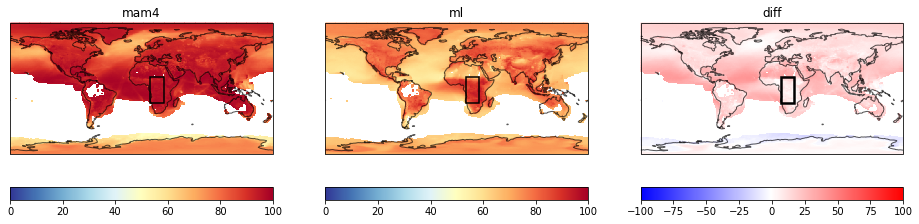

mam4 mean: 96.40267360745827
ml mean: 87.1914291381836
diff mean: 9.21124705884749
abs diff mean: 9.212653228016014
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.005945,0.000536,0.000000,0.008329,0.020965
Accumulation,2.453061,15.652847,1.141771,18.340945,30.557153,8.833459
Primary carbon,2.414727,0.000000,0.000000,20.570263,0.000000,0.000000


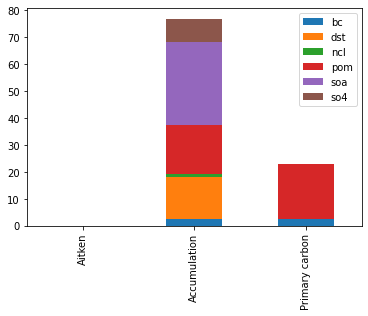

In [9]:
chi = "chi_b"
(lat_min, lat_max, lon_min, lon_max) = (-20,15,12,30)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Southern Asia

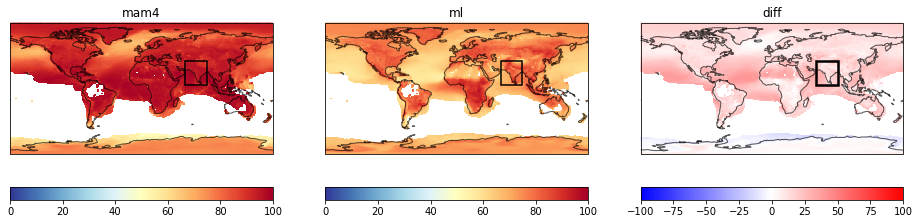

mam4 mean: 95.34830891198659
ml mean: 76.47638702392578
diff mean: 18.871921931786826
abs diff mean: 18.871921931786826
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.005394,0.006976,0.000000,0.018911,0.242121
Accumulation,4.370455,13.418938,6.667772,17.820493,14.056544,35.523126
Primary carbon,1.481802,0.000000,0.000000,6.387469,0.000000,0.000000


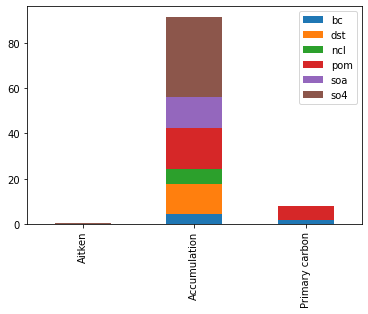

In [10]:
chi = "chi_b"
(lat_min, lat_max, lon_min, lon_max) = (5,38,60,90)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Difference

In [11]:
chi = "chi_b"
method="diff"
diff = da[chi][method].to_dataframe().reset_index().dropna().reset_index(drop=False)
(diff[diff["chi_b"]>0].shape[0])/(diff.shape[0])

0.9175359233634912

## Antarctic

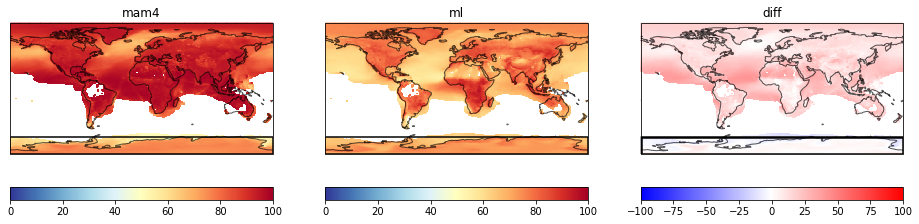

mam4 mean: 72.20210534015378
ml mean: 72.04602813720703
diff mean: 0.15607629828270644
abs diff mean: 3.600053410040413
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.001395,0.375050,0.000000,0.047077,15.683071
Accumulation,0.277480,1.643955,27.628505,1.776728,2.016034,42.450717
Primary carbon,1.318616,0.000000,0.000000,6.781372,0.000000,0.000000


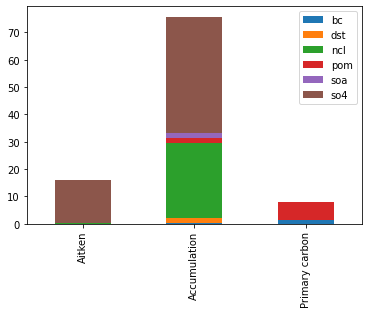

In [12]:
chi = "chi_b"
(lat_min, lat_max, lon_min, lon_max) = (-90,-66.5,-180.01,180.1)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)